In [1]:
# Import necessary libraries
from dataframe_utils import * # this imports all the functions from our dataframe_utils including all the imports
from plotting_utils import * # this imports all the functions from our plotting_utils
%load_ext autoreload
%autoreload 2

In [2]:
os.getcwd()
# this is a windows command

'/zstorage/hera/inShell/Analysis/code'

In [3]:
# NB this needs to change for each anaylsis run
run_name = "20230427"
start_age = 6 

In [4]:
df = pd.read_csv(f'../{run_name}/data/{run_name}.csv')
df.head()

,file_name,file_type,frame,class,xcenter_normalized,ycenter_normalized,width_normalized,height_normalized,confidence
0,20230427_173238_010,image_,0,wriggler,0.287842,0.295166,0.023926,0.018066,0.504009
1,20230427_173238_010,image_,0,wriggler,0.287109,0.302734,0.024414,0.020508,0.702260
2,20230427_173238_010,image_,0,wriggler,0.287598,0.288086,0.026367,0.011719,0.773588
3,20230427_173238_010,image_,0,wriggler,0.311035,0.294189,0.024414,0.016113,0.810041
4,20230427_173238_010,image_,0,wriggler,0.291748,0.430420,0.023926,0.018066,0.827705


##  Creating additional columns

In [5]:
df["file_name"] = df["file_name"].astype(str)

In [6]:
# Adding time: add_time_col is a function in dataframe_utils
df = add_time_col(df)

In [7]:
# # Adding an absolute time column
#df = add_relative_time_col(df)

In [8]:
# Adding dpf: function in dataframe_utils applied to each element in a series (column)
df = add_dpf_col_human_time(df)

In [9]:
df['dpf']=df['dpf']+ start_age

In [10]:
df['day_period'] = df['time_of_day'].apply(lambda x: '1' if 0 <= x.hour <= 5 else '2' if 6 <= x.hour <= 11 else '3' if 12 <= x.hour <= 17 else "4")

In [11]:
df = df[df["confidence"]>= 0.5]

In [12]:
df.head()

,file_name,file_type,frame,class,xcenter_normalized,ycenter_normalized,width_normalized,height_normalized,confidence,time_of_day,dpf,day_period
5411,20230427_132214_010,image_,0,wriggler,0.406006,0.285889,0.022949,0.017090,0.763499,2023-04-27 13:22:14,6,3
5412,20230427_132214_010,image_,0,wriggler,0.704590,0.479980,0.020508,0.026367,0.779802,2023-04-27 13:22:14,6,3
5413,20230427_132214_010,image_,0,wriggler,0.480469,0.298340,0.039062,0.020508,0.821346,2023-04-27 13:22:14,6,3
5414,20230427_132214_010,image_,0,wriggler,0.674805,0.294678,0.024414,0.031738,0.839269,2023-04-27 13:22:14,6,3
5415,20230427_132214_010,image_,0,wriggler,0.283936,0.292969,0.023926,0.032227,0.857135,2023-04-27 13:22:14,6,3


## Extract ROI column (single df)

#### Load ROI json file

In [13]:
ROI_file_path = f'../{run_name}/data/{run_name}.json'
ROI_dict = get_ROI_dict(ROI_file_path)

#### Plot ROIs on frame

In [14]:
# define a function to plot our ROIs on the background frame (as a sanity check)
from matplotlib.patches import PathPatch

reference_frame_path = f'../{run_name}/data/{run_name}_reference_frame.JPEG'
backgd_img = plt.imread(reference_frame_path) # load backround frame to plot ROIs on
def plot_chambers(polygons_dict):
    fig, ax = plt.subplots(1, 1)

    ax.imshow(backgd_img, cmap='gray')

    for roi_label, roi_polygon in polygons_dict.items():
        patch = PathPatch(roi_polygon, facecolor='blue', lw=1, alpha=0.4)
        ax.text(*np.mean(roi_polygon.vertices, axis=0), roi_label, color='white', size='small')
        ax.add_patch(patch)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return fig

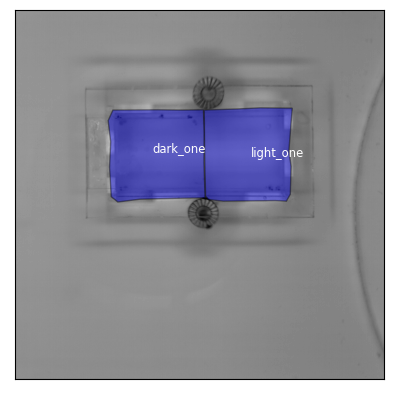

In [15]:
fig = plot_chambers(ROI_dict)

In [16]:
figure_path = f'../{run_name}/plots/{run_name}_ROI.pdf'
save_figure(fig, figure_path)

Figure saved to: /zstorage/hera/inShell/Analysis/20230427/plots/20230427_ROI.pdf


In [17]:
backgd_img.shape

(2048, 2048)

In [18]:
# get the width and height of the frame
height, width= backgd_img.shape
# this is needed as our position coordinates are normalized between 0 and 1 while our ROI coordinates are not
height, width

(2048, 2048)

In [19]:
# apply the above function to the x and y coordinates in each row of our larvae dataframe
# Add + n to "larvae["dpf"] = larvae["dpf"]" if the run is started later than 0 dpf
df = add_ROI_col(df, width, height, ROI_dict)
df["dpf"] = df["dpf"]

In [20]:
df.head()

,file_name,file_type,frame,class,xcenter_normalized,ycenter_normalized,width_normalized,height_normalized,confidence,time_of_day,dpf,day_period,ROI
5411,20230427_132214_010,image_,0,wriggler,0.406006,0.285889,0.022949,0.017090,0.763499,2023-04-27 13:22:14,6,3,dark_one
5412,20230427_132214_010,image_,0,wriggler,0.704590,0.479980,0.020508,0.026367,0.779802,2023-04-27 13:22:14,6,3,light_one
5413,20230427_132214_010,image_,0,wriggler,0.480469,0.298340,0.039062,0.020508,0.821346,2023-04-27 13:22:14,6,3,dark_one
5414,20230427_132214_010,image_,0,wriggler,0.674805,0.294678,0.024414,0.031738,0.839269,2023-04-27 13:22:14,6,3,light_one
5415,20230427_132214_010,image_,0,wriggler,0.283936,0.292969,0.023926,0.032227,0.857135,2023-04-27 13:22:14,6,3,dark_one


In [ ]:
concatinate tables here

## Tallying larvae numbers

In [21]:
preference_table = pd.pivot_table(df, values='frame', index=['dpf', 'day_period'],
                    columns=['ROI'], aggfunc="count", fill_value=0)
preference_table.reset_index(inplace=True)
preference_table = preference_table.rename_axis(None, axis=1)
preference_table.head(10)

,dpf,day_period,dark_one,light_one,outside
0,6,3,5510,1933,2
1,6,4,8573,584,3
2,7,1,9736,472,5
3,7,2,9842,176,10
4,7,3,2837,44,0


In [22]:
preference_table['total']= preference_table['dark_one']+preference_table['light_one']+preference_table['outside']
preference_table['percentage']= (preference_table['dark_one']/preference_table['total'])*100

In [23]:
preference_table.head(10)

,dpf,day_period,dark_one,light_one,outside,total,percentage
0,6,3,5510,1933,2,7445,74.009402
1,6,4,8573,584,3,9160,93.591703
2,7,1,9736,472,5,10213,95.329482
3,7,2,9842,176,10,10028,98.145193
4,7,3,2837,44,0,2881,98.472753


In [31]:
# Pre-graphing definitions 
x_labels = preference_table.apply(lambda x: f'{x["dpf"]} - {x["day_period"]}', axis=1)
colors = {'1': 'gray', '2': 'gold', '3': 'gold', '4':'gray'}

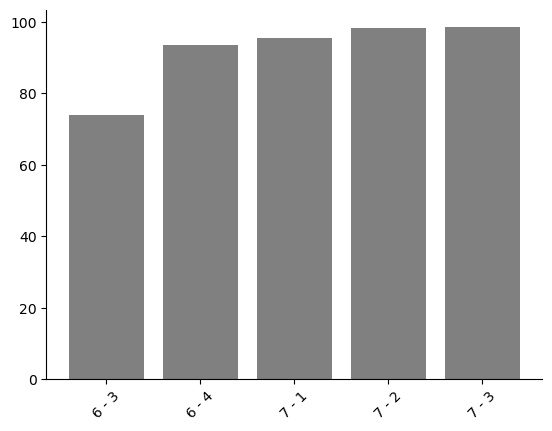

In [38]:
#plotting the simple graph 
plt.bar(preference_table.index, preference_table['percentage'], color='grey')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(preference_table.index, x_labels, rotation=45)

# Show the plot
plt.show()

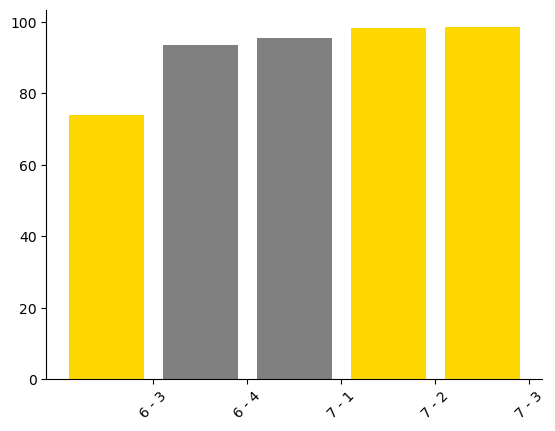

In [35]:
# graph with day night colours but WRONG x axis label
fig, ax = plt.subplots()
for i, subcat in enumerate(preference_table['day_period'].unique()):
    sub_df = preference_table[preference_table['day_period'] == subcat]
    ax.bar(sub_df.index, sub_df['percentage'], color=colors[subcat], label=subcat)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(tick_pos)
ax.set_xticklabels(x_labels, rotation=45)

plt.show()

NameError: name 'percentage' is not defined

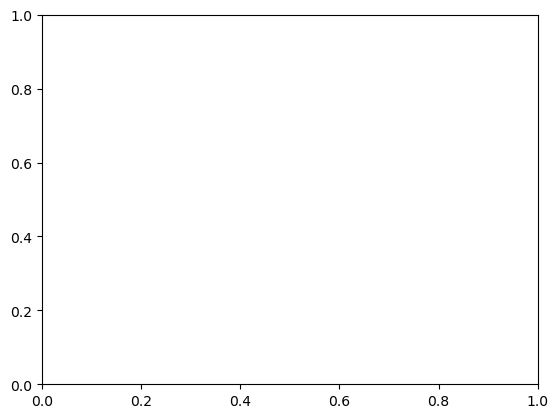

In [57]:
fig, ax = plt.subplots()

ax.bar(percentage, bar_width, label='night', color='black', edgecolor='black')
ax.set_xticks(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_ylabel('Time spent inside shell (frames)')
ax.set_xlabel('Days post fertilisation')
ax.set_title('Mom visits')

plt.show()

#### Visitation total (day and nights)

(-0.5, 12.5)

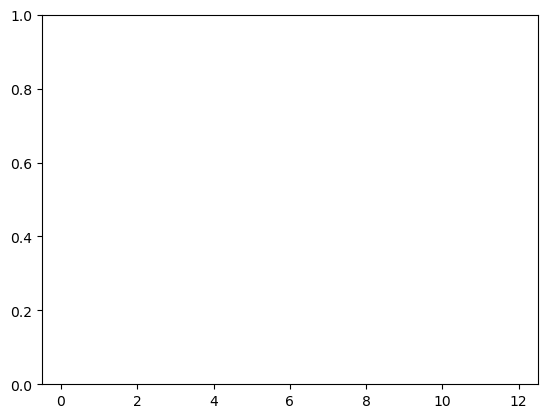

In [70]:
# fig, ax = plt.subplots()
# labels = range(max(visitation_counts['dpf'])+1)
# bar_width = 0.8 
# ax.set_xlim(-0.5,12.5)

In [71]:
range(max(visitation_counts['dpf'])+1)

range(0, 12)

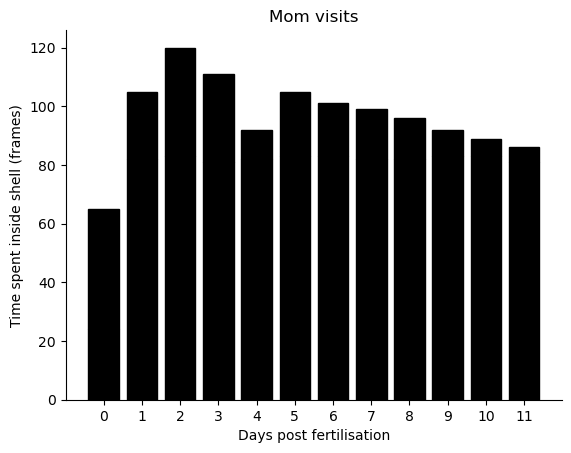

In [76]:
# for when day and night counts exist
fig, ax = plt.subplots()

ax.bar(labels, night_counts, bar_width, label='night', color='black', edgecolor='black')
ax.bar(labels, day_counts, bar_width, bottom=night_counts, label='day', color='black', edgecolor='black')
ax.set_xticks(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_ylabel('Time spent inside shell (frames)')
ax.set_xlabel('Days post fertilisation')
ax.set_title('Mom visits')

plt.show()